In [1]:
from IPython.display import display,HTML
import warnings
warnings.filterwarnings(action='ignore')

#데이터 전처리
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler
#기계학습 모델 및 평가
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.metrics import accuracy_score,recall_score,precision_score,mean_squared_error,confusion_matrix
from tqdm import tqdm
from sklearn.model_selection import KFold
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#시각화
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap
from datetime import datetime
from io import StringIO
matplotlib.rcParams['axes.unicode_minus'] = False
#한글 폰트 설정
plt.rc('font',family ='Malgun Gothic')
import matplotlib.dates as mdates


from changefinder import ChangeFinder


0       2001-01-28
1       2001-05-18
2       2001-05-19
3       2001-05-20
4       2001-05-21
           ...    
7025    2023-05-14
7026    2023-05-15
7027    2023-05-16
7028    2023-05-17
7029    2023-05-18
Name: 일시, Length: 7030, dtype: object
               지점  평균 풍속(m/s)  평균기압(hPa)  평균 상대습도(%)  평균 기온(°C)  평균 수온(°C)  \
일시                                                                           
2001-05-21  22105         5.8     1008.3        93.0       15.6       16.6   
2001-05-22  22105         8.5     1008.1        95.0       14.2       16.3   
2001-05-23  22105         8.0     1006.2        95.0       14.9       16.6   
2001-05-24  22105         8.6     1006.7        90.0       13.9       16.5   
2001-05-25  22105         5.4     1006.7        87.0       16.3       16.5   
...           ...         ...        ...         ...        ...        ...   
2023-05-14  22105         3.2     1008.9        97.0       17.9       16.2   
2023-05-15  22105         4.3     1007.6        94.

c:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


PeriodIndex(['2023-05-31', '2023-06-01', '2023-06-02', '2023-06-03',
             '2023-06-04', '2023-06-05', '2023-06-06', '2023-06-07',
             '2023-06-08', '2023-06-09',
             ...
             '2041-08-14', '2041-08-15', '2041-08-16', '2041-08-17',
             '2041-08-18', '2041-08-19', '2041-08-20', '2041-08-21',
             '2041-08-22', '2041-08-23'],
            dtype='period[D]', length=6660)
6660     16.636332
6661     16.496818
6662     16.616789
6663     16.402425
6664     16.845134
           ...    
13315    17.524246
13316    17.500333
13317    17.696342
13318    17.818356
13319    17.777903
Name: predicted_mean, Length: 6660, dtype: float64


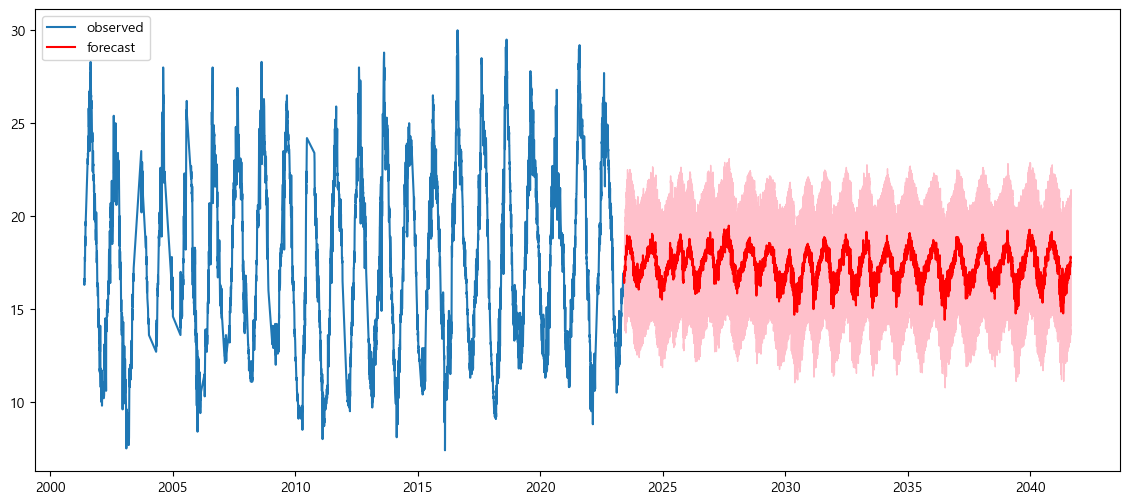

                                      SARIMAX Results                                       
Dep. Variable:                            평균 수온(°C)   No. Observations:                 6660
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 18)   Log Likelihood               -6635.861
Date:                              Wed, 31 May 2023   AIC                          13293.722
Time:                                      12:49:27   BIC                          13368.564
Sample:                                           0   HQIC                         13319.576
                                             - 6660                                         
Covariance Type:                                opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
평균 풍속(m/s)     -0.0116      0.005     -2.569      0.010      -0.021      -0.003
평균기압(hPa)       

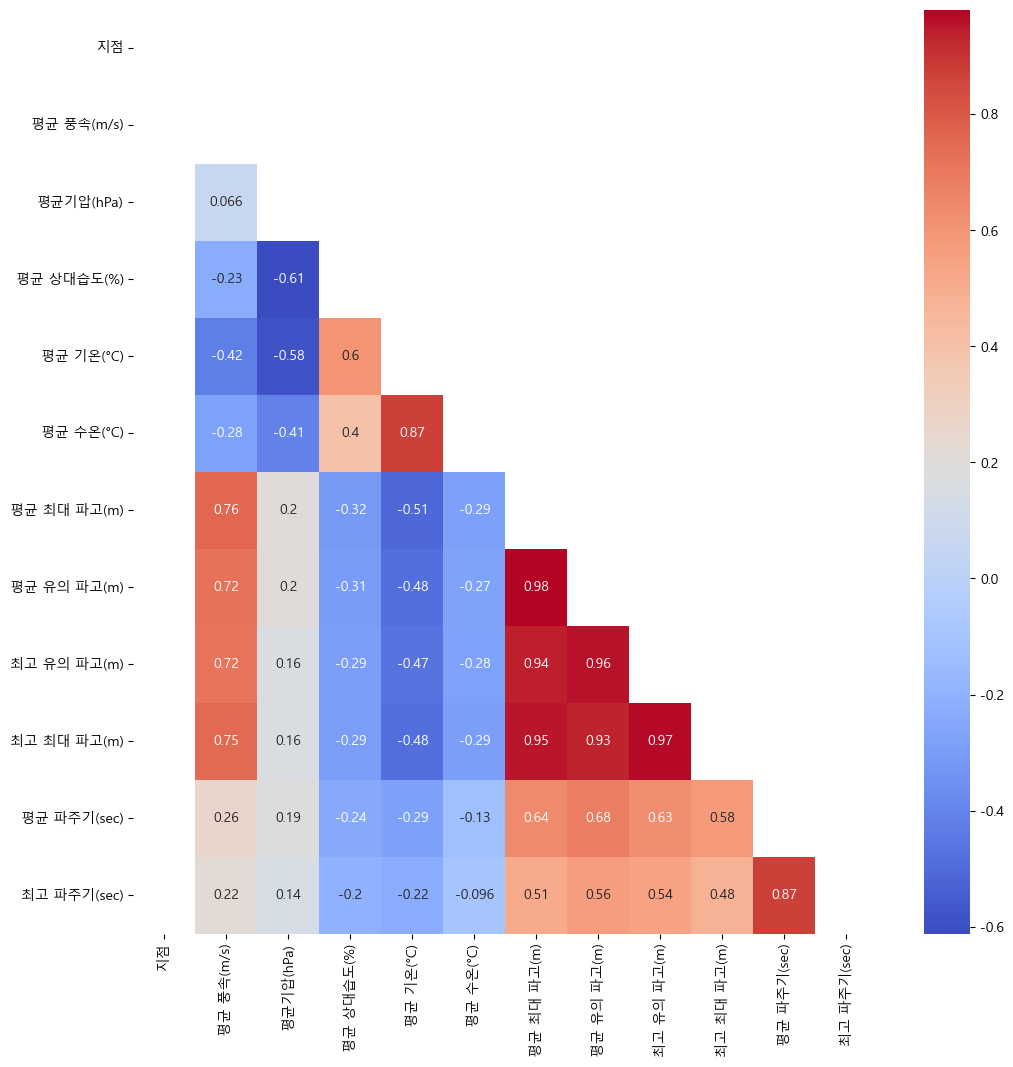

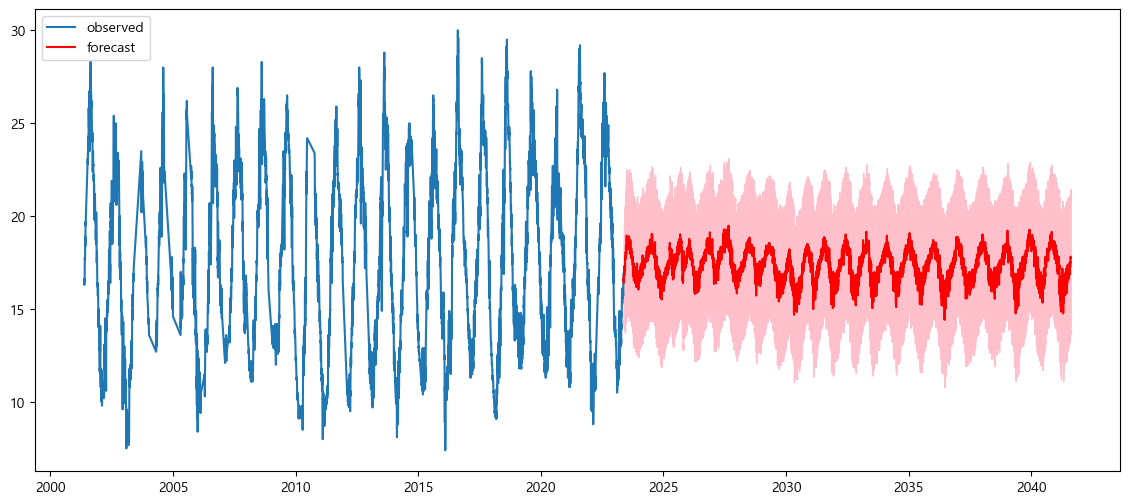

                                      SARIMAX Results                                       
Dep. Variable:                            평균 수온(°C)   No. Observations:                 6660
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 18)   Log Likelihood               -6635.861
Date:                              Wed, 31 May 2023   AIC                          13293.722
Time:                                      12:49:28   BIC                          13368.564
Sample:                                           0   HQIC                         13319.576
                                             - 6660                                         
Covariance Type:                                opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
평균 풍속(m/s)     -0.0116      0.005     -2.569      0.010      -0.021      -0.003
평균기압(hPa)       

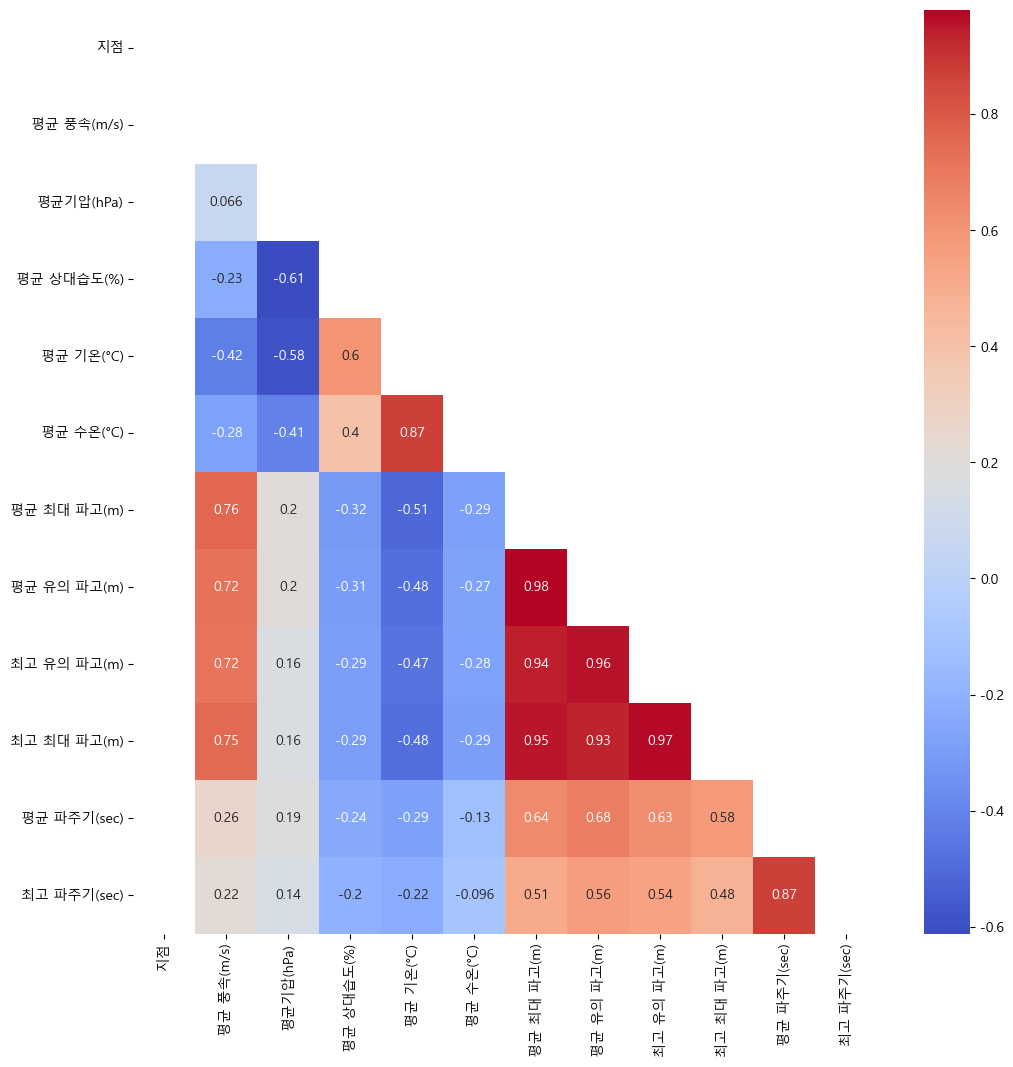

In [2]:
# csv 파일을 읽어옵니다.
from sklearn.preprocessing import StandardScaler,robust_scale
import pandas as pd
# 데이터를 불러옵니다.
data = pd.read_csv('data/20230519동해해양데이터.csv', parse_dates=True, encoding='utf-8')
date = data['일시']
date=date.dropna()
print(date)

data = data.sort_values('일시', ascending=True)
data.loc[data['평균 수온(°C)'] == 0, '평균 수온(°C)'] = np.nan
data=data.dropna()

data = data.reset_index()  # 인덱스를 열로 변환
data = data.drop(['index'],axis=1)

data = data.rename(columns={'일시': 'date'})  # 열 이름 변경
data['date'] = pd.to_datetime(data['date'], format="%Y.%m")  # 날짜 형식으로 변환
data = data.rename(columns={'date': '일시'})
data = data.set_index('일시')  # 다시 인덱스로 설정

print(data)
# 스케일링
# 인덱스를 PeriodIndex로 변환합니다.
# data = data.iloc[::-1]
# data.index = pd.date_range(start='2013-01-06', periods=len(data), freq='d')
# exog를 다시 정의합니다.
exog = data[['평균 풍속(m/s)','평균기압(hPa)','평균 상대습도(%)','평균 기온(°C)','평균 최대 파고(m)','평균 유의 파고(m)','평균 파주기(sec)']]
print(exog)
# 시계열 모델을 학습합니다.
model = SARIMAX(data['평균 수온(°C)'], order=(1, 0, 0), seasonal_order=(1, 0, 1, 18), exog=exog)

results = model.fit(disp=False)

# 예측 기간을 설정합니다.
forecast_steps = len(data)

# 예측 결과와 신뢰 구간을 얻습니다.
forecast = results.get_forecast(steps=forecast_steps, exog=exog[-forecast_steps:])
forecast_conf_int = forecast.conf_int()
# 예측 결과의 인덱스를 원본 데이터와 동일한 시간 범위로 설정합니다.
from numpy import timedelta64

# 예측 결과의 인덱스를 원본 데이터와 동일한 시간 범위로 설정합니다.
# forecast_index = pd.period_range(start=data.index[-1] + timedelta64(1, 'M'), periods=forecast_steps, freq='M')

# forecast_index = pd.period_range(data.index[-1] + 1, periods=forecast_steps, freq='M')
forecast_index = pd.period_range(start='2023-05-31', periods=forecast_steps, freq='d')
print(forecast_index)

forecast_index_timestamp = forecast_index.to_timestamp()  # PeriodIndex를 Timestamp로 변환
forecast.predicted_mean.index = forecast_index
forecast_conf_int.index = forecast_index
print(forecast.predicted_mean)

# 결과를 시각화합니다.
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(data.index, data['평균 수온(°C)'], label='observed')
plt.plot(forecast_index, forecast.predicted_mean, label='forecast', color='r')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink')
plt.legend(loc='upper left')
plt.show()

print(results.summary())

# 예측 오차 계산
from sklearn.metrics import mean_squared_error
import numpy as np

y_true = data['평균 수온(°C)'][-forecast_steps:]
y_pred = forecast.predicted_mean
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(y_pred)
y_pred.to_csv('forecast_results(stemp).csv', index=True, index_label='date')

# 예측 오차 출력
print('RMSE:', rmse)
import seaborn as sns

corr = data.corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(12, 12))
sns.heatmap(corr, cmap='coolwarm', annot=True, mask=mask)
plt.show()

forecast_index = pd.period_range(start='2023-05-19', periods=forecast_steps, freq='d')
forecast_index_timestamp = forecast_index.to_timestamp()  # PeriodIndex를 Timestamp로 변환
forecast.predicted_mean.index = forecast_index
forecast_conf_int.index = forecast_index


# 결과를 시각화합니다.
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(data.index, data['평균 수온(°C)'], label='observed')
plt.plot(forecast_index, forecast.predicted_mean, label='forecast', color='r')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink')
plt.legend(loc='upper left')
plt.show()

print(results.summary())

# 예측 오차 계산
from sklearn.metrics import mean_squared_error
import numpy as np

y_true = data['평균 수온(°C)'][-forecast_steps:]
y_pred = forecast.predicted_mean
rmse = np.sqrt(mean_squared_error(y_true, y_pred))



# 예측 오차 출력
print('RMSE:', rmse)
import seaborn as sns

corr = data.corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(12, 12))
sns.heatmap(corr, cmap='coolwarm', annot=True, mask=mask)
plt.show()


forecast.predicted_mean.to_csv('data/stemp_data_day_forecast.csv', index=False)
data.to_csv('data/stemp_data_day_data.csv', index=False)

0       1998-04-07
1       1998-04-08
2       1998-04-09
3       1998-04-10
4       1998-05-07
           ...    
8580    2023-05-13
8581    2023-05-14
8582    2023-05-15
8583    2023-05-16
8584    2023-05-17
Name: 일시, Length: 8585, dtype: object
            평균 풍속(m/s)    평균기압(hPa)  평균 상대습도(%)  평균 기온(°C)  평균 수온(°C)  \
일시                                                                      
1998-04-30         NaN          NaN         NaN        NaN        NaN   
1998-05-31    3.569231  1012.180000   82.333333  19.227273  19.181818   
1998-06-30    7.190476  1008.400000   87.363636  19.522727  20.072727   
1998-07-31    7.061538  1006.610714   92.111111  23.914286  24.278571   
1998-08-31    5.250000  1009.254545   90.150000  25.568421  26.023810   
...                ...          ...         ...        ...        ...   
2023-01-31    6.900000  1022.877419   59.548387   6.877419  14.916129   
2023-02-28    6.371429  1023.892857   63.500000   9.128571  14.142857   
2023-03-31    5.619355 

c:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


PeriodIndex(['2023-05', '2023-06', '2023-07', '2023-08', '2023-09', '2023-10',
             '2023-11', '2023-12', '2024-01', '2024-02',
             ...
             '2047-01', '2047-02', '2047-03', '2047-04', '2047-05', '2047-06',
             '2047-07', '2047-08', '2047-09', '2047-10'],
            dtype='period[M]', length=294)
294    19.199092
295    19.920108
296    22.712481
297    23.593165
298    24.074480
         ...    
583    13.065542
584    14.313424
585    16.396185
586    17.850342
587    17.021905
Name: predicted_mean, Length: 294, dtype: float64


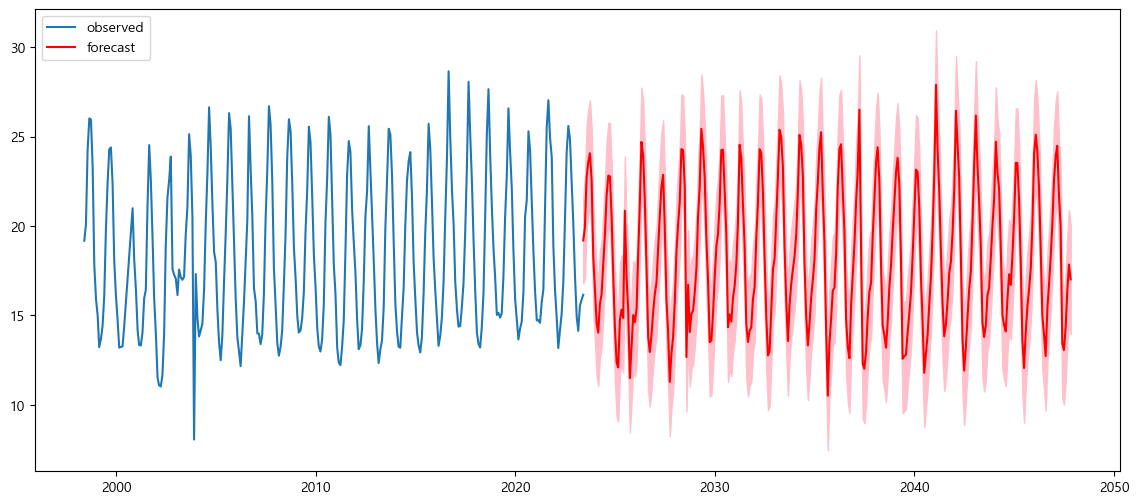

                                      SARIMAX Results                                       
Dep. Variable:                            평균 수온(°C)   No. Observations:                  294
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 18)   Log Likelihood                -477.242
Date:                              Wed, 31 May 2023   AIC                            976.485
Time:                                      12:49:31   BIC                           1017.004
Sample:                                           0   HQIC                           992.711
                                              - 294                                         
Covariance Type:                                opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
평균 풍속(m/s)      0.1408      0.150      0.939      0.348      -0.153       0.435
평균기압(hPa)       

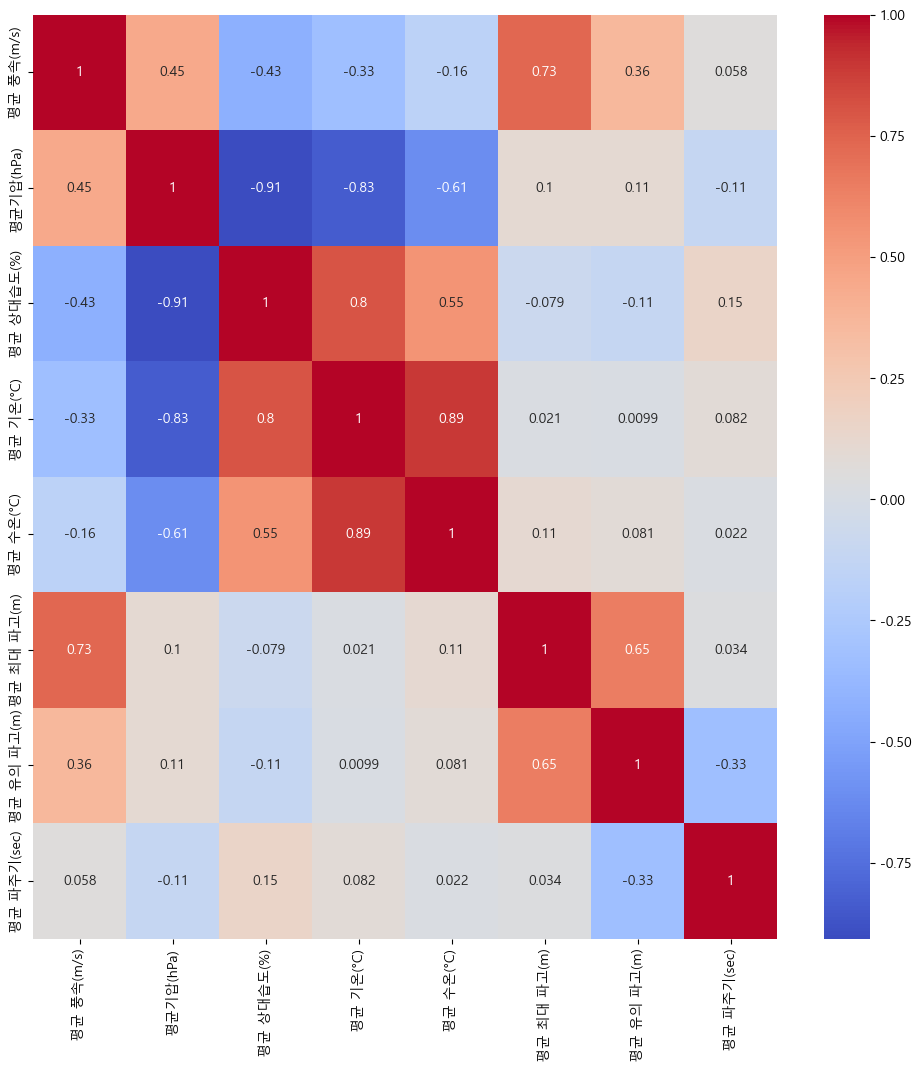

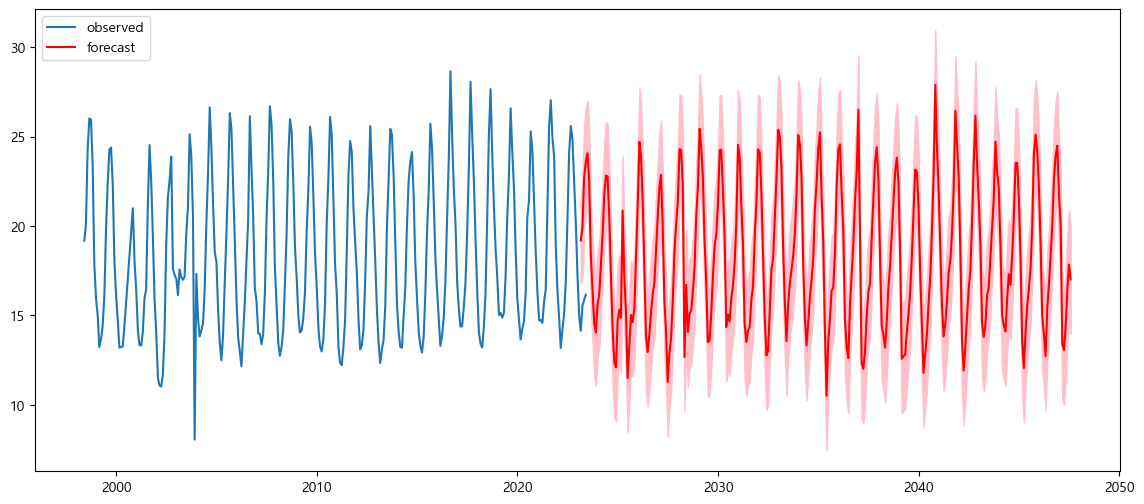

                                      SARIMAX Results                                       
Dep. Variable:                            평균 수온(°C)   No. Observations:                  294
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 18)   Log Likelihood                -477.242
Date:                              Wed, 31 May 2023   AIC                            976.485
Time:                                      12:49:31   BIC                           1017.004
Sample:                                           0   HQIC                           992.711
                                              - 294                                         
Covariance Type:                                opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
평균 풍속(m/s)      0.1408      0.150      0.939      0.348      -0.153       0.435
평균기압(hPa)       

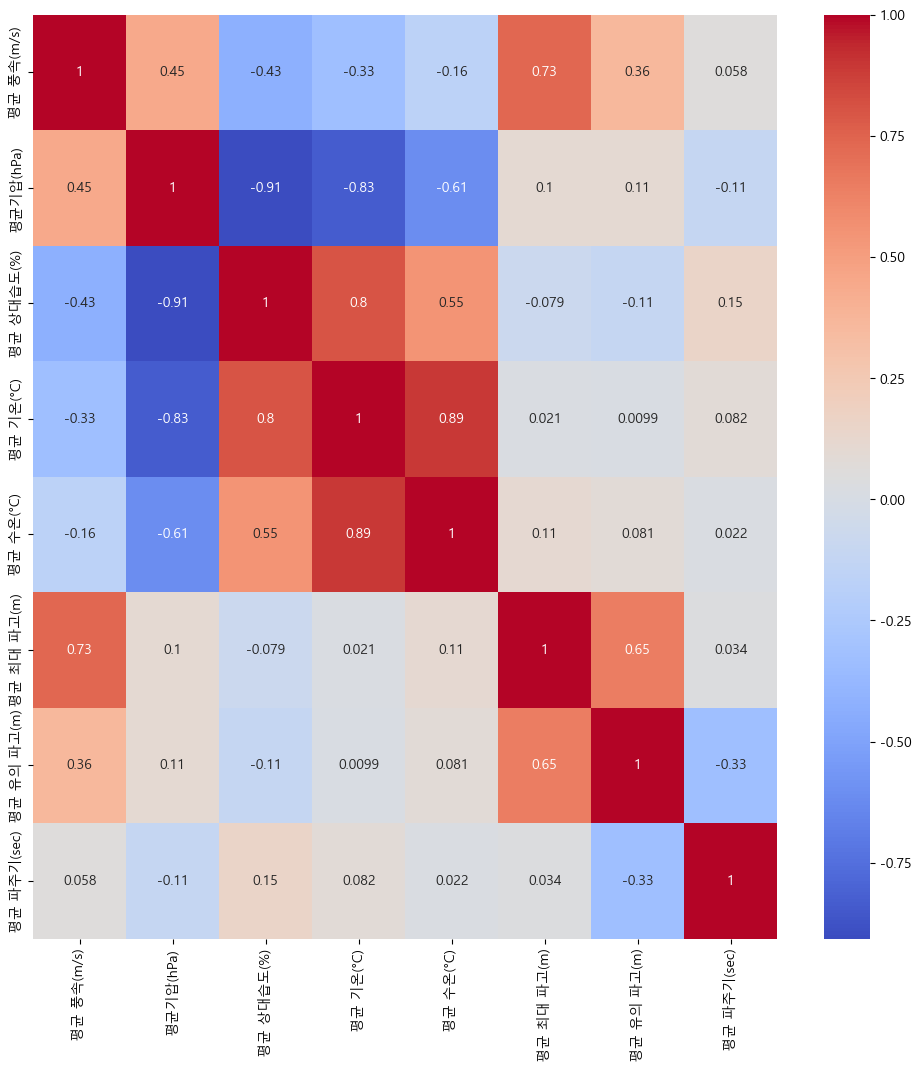

In [3]:
# csv 파일을 읽어옵니다.
from sklearn.preprocessing import StandardScaler,robust_scale
import pandas as pd
# 데이터를 불러옵니다.
data = pd.read_csv('data/20230518거제해양데이터.csv', parse_dates=True, encoding='utf-8')
date = data['일시']
date=date.dropna()
print(date)
data=data.set_index(pd.to_datetime(data.일시)) # Date를 인덱스로
data.index = pd.to_datetime(data.index)
data = data[['평균 풍속(m/s)','평균기압(hPa)','평균 상대습도(%)','평균 기온(°C)','평균 수온(°C)','평균 최대 파고(m)','평균 유의 파고(m)','평균 파주기(sec)']].resample('M').mean()

print(data)
data = data.sort_values('일시', ascending=True)
data.loc[data['평균 수온(°C)'] == 0, '평균 수온(°C)'] = np.nan
data=data.dropna()

data = data.reset_index()  # 인덱스를 열로 변환
# data = data.drop(['index'],axis=1)

data = data.rename(columns={'일시': 'date'})  # 열 이름 변경
# data['date'] = pd.to_datetime(data['date'], format="%Y.%m")  # 날짜 형식으로 변환
data = data.rename(columns={'date': '일시'})
data = data.set_index('일시')  # 다시 인덱스로 설정

print(data)
# 스케일링
# 스케일링
# 인덱스를 PeriodIndex로 변환합니다.
# data = data.iloc[::-1]
# data.index = pd.date_range(start='2013-01-06', periods=len(data), freq='d')
# exog를 다시 정의합니다.
exog = data[['평균 풍속(m/s)','평균기압(hPa)','평균 상대습도(%)','평균 기온(°C)','평균 최대 파고(m)','평균 유의 파고(m)','평균 파주기(sec)']]
print(exog)
# 시계열 모델을 학습합니다.
model = SARIMAX(data['평균 수온(°C)'], order=(1, 0, 0), seasonal_order=(1, 0, 1, 18), exog=exog)

results = model.fit(disp=False)

# 예측 기간을 설정합니다.
forecast_steps = len(data)

# 예측 결과와 신뢰 구간을 얻습니다.
forecast = results.get_forecast(steps=forecast_steps, exog=exog[-forecast_steps:])
forecast_conf_int = forecast.conf_int()
# 예측 결과의 인덱스를 원본 데이터와 동일한 시간 범위로 설정합니다.
from numpy import timedelta64

# 예측 결과의 인덱스를 원본 데이터와 동일한 시간 범위로 설정합니다.
# forecast_index = pd.period_range(start=data.index[-1] + timedelta64(1, 'M'), periods=forecast_steps, freq='M')

# forecast_index = pd.period_range(data.index[-1] + 1, periods=forecast_steps, freq='M')
forecast_index = pd.period_range(start='2023-05-19', periods=forecast_steps, freq='m')
print(forecast_index)

forecast_index_timestamp = forecast_index.to_timestamp()  # PeriodIndex를 Timestamp로 변환
forecast.predicted_mean.index = forecast_index
forecast_conf_int.index = forecast_index
print(forecast.predicted_mean)
# 
# 결과를 시각화합니다.
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(data.index, data['평균 수온(°C)'], label='observed')
plt.plot(forecast_index, forecast.predicted_mean, label='forecast', color='r')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink')
plt.legend(loc='upper left')
plt.show()

print(results.summary())

# 예측 오차 계산
from sklearn.metrics import mean_squared_error
import numpy as np

y_true = data['평균 수온(°C)'][-forecast_steps:]
y_pred = forecast.predicted_mean
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(y_pred)
y_pred.to_csv('forecast_results(stemp).csv', index=True, index_label='date')

# 예측 오차 출력
print('RMSE:', rmse)
import seaborn as sns

corr = data.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

forecast_index = pd.period_range(start='2023-02-26', periods=forecast_steps, freq='m')
forecast_index_timestamp = forecast_index.to_timestamp()  # PeriodIndex를 Timestamp로 변환
forecast.predicted_mean.index = forecast_index
forecast_conf_int.index = forecast_index


# 결과를 시각화합니다.
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(data.index, data['평균 수온(°C)'], label='observed')
plt.plot(forecast_index, forecast.predicted_mean, label='forecast', color='r')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink')
plt.legend(loc='upper left')
plt.show()

print(results.summary())

# 예측 오차 계산
from sklearn.metrics import mean_squared_error
import numpy as np

y_true = data['평균 수온(°C)'][-forecast_steps:]
y_pred = forecast.predicted_mean
rmse = np.sqrt(mean_squared_error(y_true, y_pred))



# 예측 오차 출력
print('RMSE:', rmse)
import seaborn as sns

corr = data.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

forecast.predicted_mean.to_csv('data/stemp_data_month_forecast.csv', index=False)
data.to_csv('data/stemp_data_month_data.csv', index=False)

0       1998-04-07
1       1998-04-08
2       1998-04-09
3       1998-04-10
4       1998-05-07
           ...    
8580    2023-05-13
8581    2023-05-14
8582    2023-05-15
8583    2023-05-16
8584    2023-05-17
Name: 일시, Length: 8585, dtype: object
            평균 풍속(m/s)    평균기압(hPa)  평균 상대습도(%)  평균 기온(°C)  평균 수온(°C)  \
일시                                                                      
1999-12-31    5.992509  1016.154307   69.519685  15.284064  18.648864   
2000-12-31    6.405650  1019.314948   60.989691   9.715979  15.453608   
2001-12-31    6.594154  1016.309568   72.735849  14.704658  17.195679   
2002-12-31    6.639474  1016.022930   73.286624  13.792675  15.526667   
2003-12-31    6.425298  1015.611976   73.248503  14.975449  18.642202   
2004-12-31    6.109581  1015.954142   72.115385  16.614201  19.077219   
2005-12-31    6.327070  1015.644409   70.439490  15.100955  18.509177   
2006-12-31    6.312460  1015.694410   72.121406  15.527796  16.427273   
2007-12-31    5.999169 

c:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)


PeriodIndex(['2022', '2023', '2024', '2025', '2026', '2027', '2028', '2029',
             '2030', '2031', '2032', '2033', '2034', '2035', '2036', '2037',
             '2038', '2039', '2040', '2041', '2042', '2043', '2044', '2045'],
            dtype='period[A-DEC]')
2023-12-31    19.005468
2024-12-31    15.084285
2025-12-31    17.215928
2026-12-31    16.523131
2027-12-31    17.518815
2028-12-31    18.777358
2029-12-31    17.863677
2030-12-31    17.983718
2031-12-31    18.372112
2032-12-31    19.243798
2033-12-31    18.663809
2034-12-31    18.568569
2035-12-31    17.811465
2036-12-31    17.788651
2037-12-31    18.523136
2038-12-31    18.346477
2039-12-31    18.411805
2040-12-31    19.152689
2041-12-31    19.260241
2042-12-31    18.570106
2043-12-31    18.767083
2044-12-31    17.640715
2045-12-31    18.591325
2046-12-31    19.182684
Freq: A-DEC, Name: predicted_mean, dtype: float64


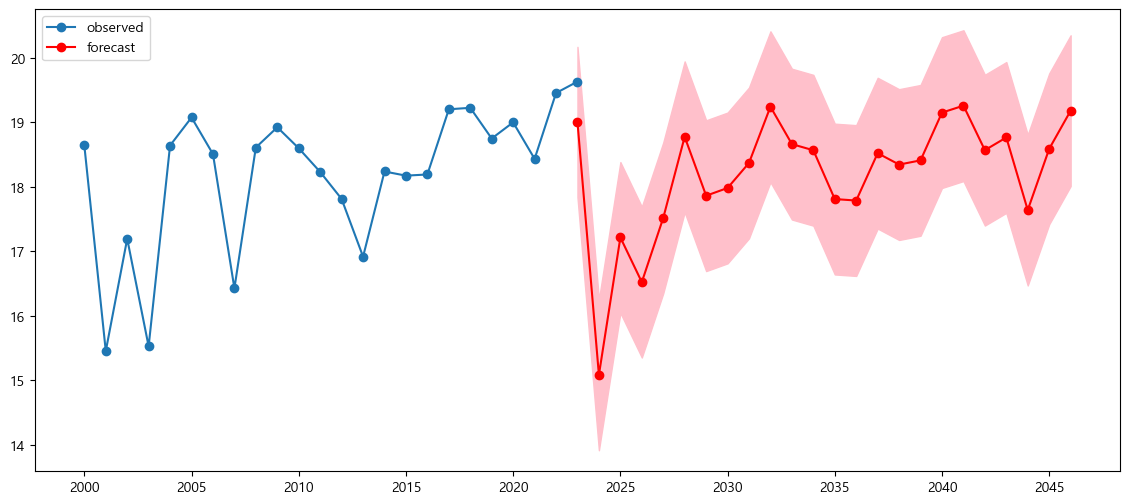

                                      SARIMAX Results                                       
Dep. Variable:                            평균 수온(°C)   No. Observations:                   24
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 18)   Log Likelihood                 -21.324
Date:                              Wed, 31 May 2023   AIC                             64.649
Time:                                      12:49:33   BIC                             77.607
Sample:                                  12-31-1999   HQIC                            68.087
                                       - 12-31-2022                                         
Covariance Type:                                opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
평균 풍속(m/s)     -0.9689      1.348     -0.719      0.472      -3.610       1.672
평균기압(hPa)       

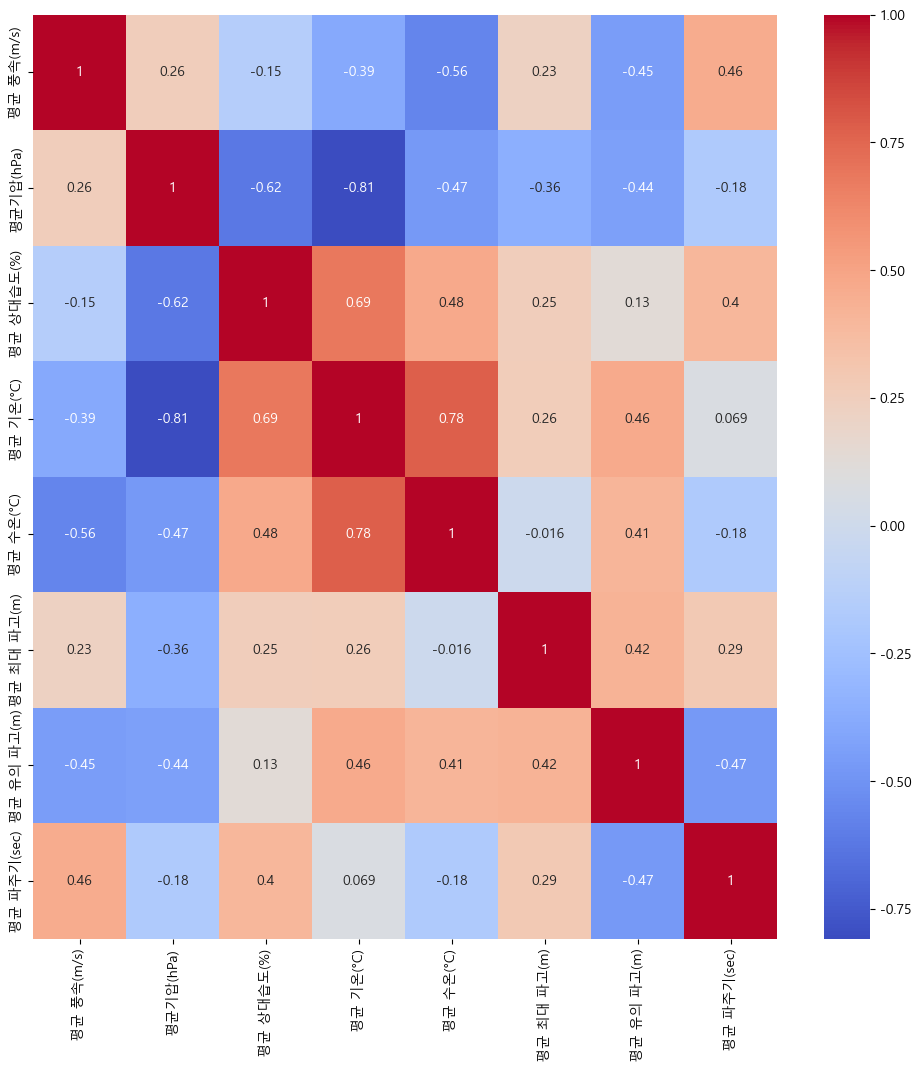

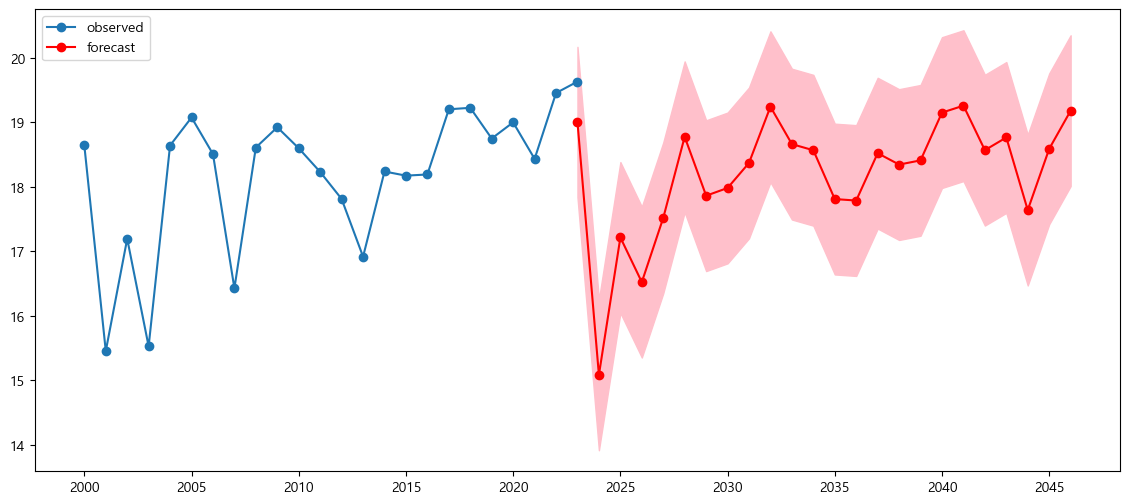

                                      SARIMAX Results                                       
Dep. Variable:                            평균 수온(°C)   No. Observations:                   24
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 18)   Log Likelihood                 -21.324
Date:                              Wed, 31 May 2023   AIC                             64.649
Time:                                      12:49:33   BIC                             77.607
Sample:                                  12-31-1999   HQIC                            68.087
                                       - 12-31-2022                                         
Covariance Type:                                opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
평균 풍속(m/s)     -0.9689      1.348     -0.719      0.472      -3.610       1.672
평균기압(hPa)       

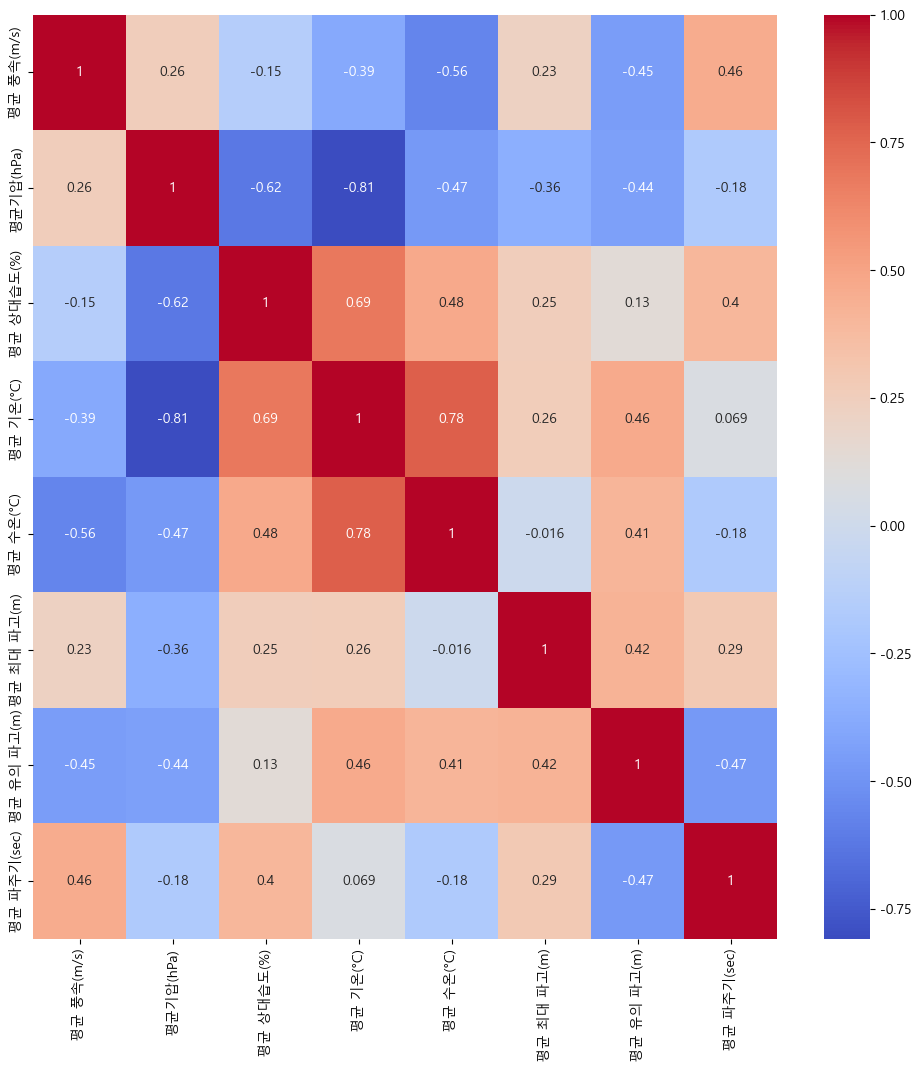

In [4]:
# csv 파일을 읽어옵니다.
from sklearn.preprocessing import StandardScaler,robust_scale
import pandas as pd
# 데이터를 불러옵니다.
data = pd.read_csv('data/20230518거제해양데이터.csv', parse_dates=True, encoding='utf-8')
date = data['일시']
date=date.dropna()
print(date)
data=data.set_index(pd.to_datetime(data.일시)) # Date를 인덱스로
data.index = pd.to_datetime(data.index)
data = data[['평균 풍속(m/s)','평균기압(hPa)','평균 상대습도(%)','평균 기온(°C)','평균 수온(°C)','평균 최대 파고(m)','평균 유의 파고(m)','평균 파주기(sec)']].resample('Y').mean()
data = data.iloc[1:-1]

print(data)
data = data.sort_values('일시', ascending=True)
data.loc[data['평균 수온(°C)'] == 0, '평균 수온(°C)'] = np.nan
data=data.dropna()

data = data.reset_index()  # 인덱스를 열로 변환
# data = data.drop(['index'],axis=1)

data = data.rename(columns={'일시': 'date'})  # 열 이름 변경
# data['date'] = pd.to_datetime(data['date'], format="%Y.%m")  # 날짜 형식으로 변환
data = data.rename(columns={'date': '일시'})
data = data.set_index('일시')  # 다시 인덱스로 설정

print(data)
# 스케일링
# 스케일링
# 인덱스를 PeriodIndex로 변환합니다.
# data = data.iloc[::-1]
# data.index = pd.date_range(start='2013-01-06', periods=len(data), freq='d')
# exog를 다시 정의합니다.
exog = data[['평균 풍속(m/s)','평균기압(hPa)','평균 상대습도(%)','평균 기온(°C)','평균 최대 파고(m)','평균 유의 파고(m)','평균 파주기(sec)']]
print(exog)
# 시계열 모델을 학습합니다.
model = SARIMAX(data['평균 수온(°C)'], order=(1, 0, 0), seasonal_order=(1, 0, 1, 18), exog=exog)

results = model.fit(disp=False)

# 예측 기간을 설정합니다.
forecast_steps = len(data)

# 예측 결과와 신뢰 구간을 얻습니다.
forecast = results.get_forecast(steps=forecast_steps, exog=exog[-forecast_steps:])
forecast_conf_int = forecast.conf_int()
# 예측 결과의 인덱스를 원본 데이터와 동일한 시간 범위로 설정합니다.
from numpy import timedelta64

# 예측 결과의 인덱스를 원본 데이터와 동일한 시간 범위로 설정합니다.
# forecast_index = pd.period_range(start=data.index[-1] + timedelta64(1, 'M'), periods=forecast_steps, freq='M')

# forecast_index = pd.period_range(data.index[-1] + 1, periods=forecast_steps, freq='M')
forecast_index = pd.period_range(start='2022-05-19', periods=forecast_steps, freq='y')
print(forecast_index)

forecast_index_timestamp = forecast_index.to_timestamp()  # PeriodIndex를 Timestamp로 변환
forecast.predicted_mean.index = forecast_index
forecast_conf_int.index = forecast_index
print(forecast.predicted_mean)
# 
# 결과를 시각화합니다.
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(data.index, data['평균 수온(°C)'], label='observed', marker='o', linestyle='-')
plt.plot(forecast_index, forecast.predicted_mean, label='forecast', color='r', marker='o', linestyle='-')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink')
plt.legend(loc='upper left')
plt.show()

print(results.summary())

# 예측 오차 계산
from sklearn.metrics import mean_squared_error
import numpy as np

y_true = data['평균 수온(°C)'][-forecast_steps:]
y_pred = forecast.predicted_mean
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(y_pred)
y_pred.to_csv('forecast_results(stemp).csv', index=True, index_label='date')

# 예측 오차 출력
print('RMSE:', rmse)
import seaborn as sns

corr = data.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

forecast_index = pd.period_range(start='2022-05-19', periods=forecast_steps, freq='y')
forecast_index_timestamp = forecast_index.to_timestamp()  # PeriodIndex를 Timestamp로 변환
forecast.predicted_mean.index = forecast_index
forecast_conf_int.index = forecast_index


# 결과를 시각화합니다.
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(data.index, data['평균 수온(°C)'], label='observed', marker='o', linestyle='-')
plt.plot(forecast_index, forecast.predicted_mean, label='forecast', color='r', marker='o', linestyle='-')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink')
plt.legend(loc='upper left')
plt.show()

print(results.summary())

# 예측 오차 계산
from sklearn.metrics import mean_squared_error
import numpy as np

y_true = data['평균 수온(°C)'][-forecast_steps:]
y_pred = forecast.predicted_mean
rmse = np.sqrt(mean_squared_error(y_true, y_pred))



# 예측 오차 출력
print('RMSE:', rmse)
import seaborn as sns

corr = data.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

forecast.predicted_mean.to_csv('data/stemp_data_month_forecast.csv', index=False)
data.to_csv('data/stemp_data_month_data.csv', index=False)